In [1]:
import matplotlib.pyplot as plt
import numpy as np
from bintrees import BinaryTree
from tqdm.notebook import tqdm_notebook
import pickle

from common import VoterData, get_random_dv, get_random_hs, HOUSE_REP_TO_POP
from solver import option2_find_f, F_ERROR, MAX_F, MIN_F

In [8]:
np.random.seed(7)
ns = 50
total = 0

# stores upper bound : sample
bounds_upper = BinaryTree()

# sample 1000 voter datas such that the fairness 
# must be non-trivial for an oracle response of Dems and Reps
pbar = tqdm_notebook(total=1000)
while total != 1000:
    stop = []
    stoh = []
    stodv = []
    for _ in range(ns):
        dv = get_random_dv()
        hs = get_random_hs()
        stodv.append(dv)
        stoh.append(hs)
        stop.append(hs * HOUSE_REP_TO_POP)
    vd = VoterData(ns, stop, stoh, stodv)
    
    # both responses should be valid
    f1, err1 = option2_find_f(vd, True)
    f2, err2 = option2_find_f(vd, False)
    if err1 != F_ERROR.none or err2 != F_ERROR.none:
        continue
    assert ((abs(f1.f_hi - f2.f_lo) < 1e-3) or (abs(f1.f_lo - f2.f_hi) < 1e-3))
    
    if f1.f_hi not in bounds_upper:
        bounds_upper.insert(f1.f_hi, vd)
        pbar.update(1)
        total += 1
    if f2.f_hi not in bounds_upper:
        bounds_upper.insert(f2.f_hi, vd)
        pbar.update(1)
        total += 1

pbar.close()

In [2]:
def get_pop(vd):
    h = np.array(vd.stoh)
    return (np.array(vd.stodv) * h).sum() / h.sum()

In [17]:
_, vd = bounds_upper.ceiling_item(1.0)
get_pop(vd)

0.4998038330282436

(array([  1.,   3.,  26., 109., 312., 373., 128.,  37.,   9.,   1.]),
 array([0.49688072, 0.49749551, 0.4981103 , 0.4987251 , 0.49933989,
        0.49995469, 0.50056948, 0.50118428, 0.50179907, 0.50241387,
        0.50302866]),
 <a list of 10 Patch objects>)

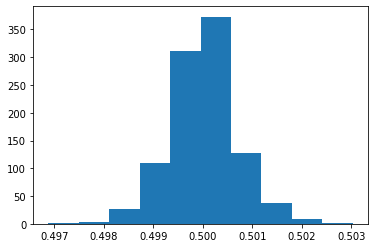

In [10]:
plt.hist(pops)

In [11]:
npops = []
for t in bounds_upper:
    npops.append(get_pop(bounds_upper[t]))

(array([  1.,   3.,  27., 109., 312., 373., 128.,  37.,   9.,   1.]),
 array([0.49688072, 0.49749551, 0.4981103 , 0.4987251 , 0.49933989,
        0.49995469, 0.50056948, 0.50118428, 0.50179907, 0.50241387,
        0.50302866]),
 <a list of 10 Patch objects>)

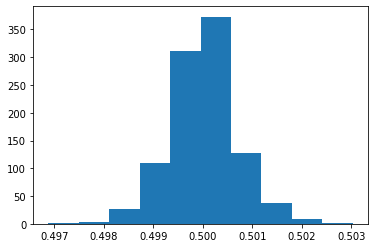

In [12]:
plt.hist(npops)

In [13]:
ret = bounds_upper.keys()

In [14]:
v = [i for i in ret]

(array([122., 104., 130., 105., 103.,  73.,  96.,  92.,  95.,  80.]),
 array([2.43539592e-03, 4.02191856e-01, 8.01948317e-01, 1.20170478e+00,
        1.60146124e+00, 2.00121770e+00, 2.40097416e+00, 2.80073062e+00,
        3.20048708e+00, 3.60024354e+00, 4.00000000e+00]),
 <a list of 10 Patch objects>)

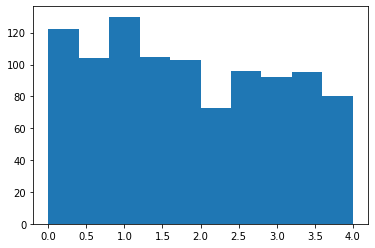

In [15]:
plt.hist(v)

In [18]:
f = open('ns=50_rand.pkl', 'wb')
pickle.dump(bounds_upper, f)
f.close()